In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.read_pikkukoski_measurement import read_pikkukoski_measurement
from src.read_weather_data import read_weather_data, resample_weather_data

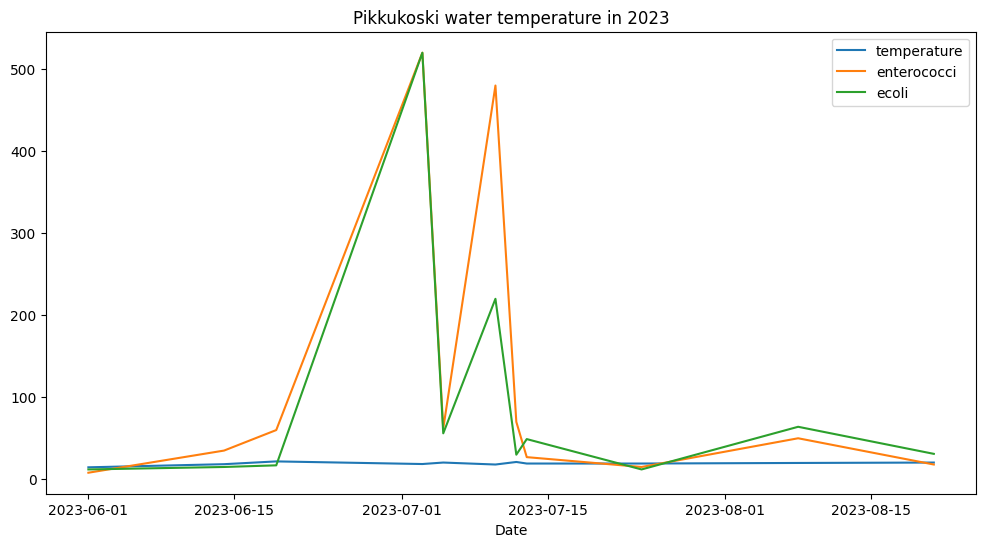

In [6]:
data = pd.read_csv("data/pikkukoski_2023.csv")
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(data.index, data["temperature"], label="temperature")
plt.plot(data.index, data["enterococci"], label="enterococci")
plt.plot(data.index, data["ecoli"], label="ecoli")

plt.title("Pikkukoski water quality in 2023")
plt.xlabel("Date")
plt.ylabel("")
plt.legend()

plt.show()

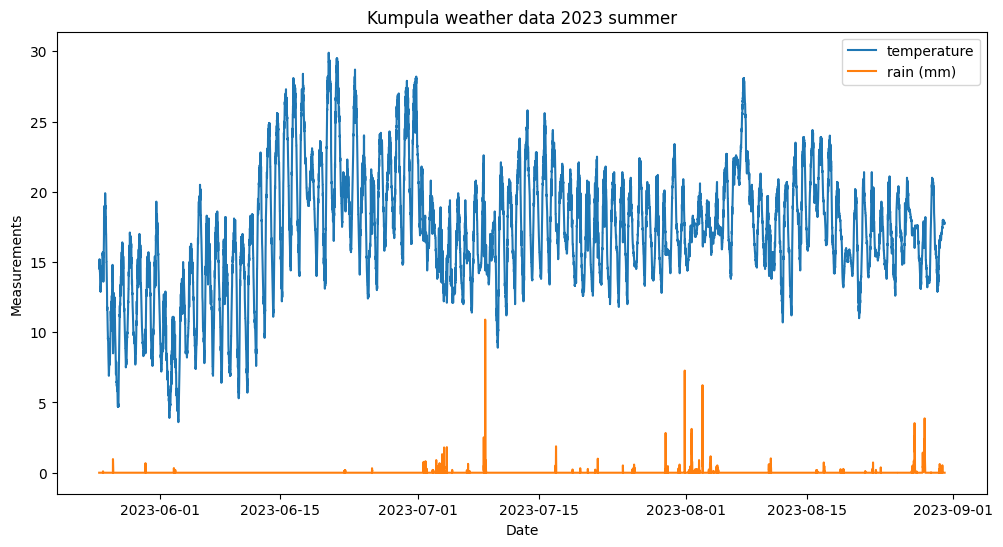

In [3]:
weather = read_weather_data("data/Helsinki Kumpula_ 25.5.2023 - 30.8.2023_d6f3d181-df41-42ba-b2eb-77d9b687db9d.csv")
plt.figure(figsize=(12, 6))
plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")
plt.title("Kumpula weather data 2023 summer")
plt.xlabel("Date")
plt.ylabel("Measurements")
plt.legend()
plt.show()

In [4]:
weather.dtypes

Havaintoasema            object
Ilman lämpötila [°C]    float64
Sademäärä [mm]          float64
dtype: object

In [5]:
print(data)

            Unnamed: 0  quality  temperature  enterococci  ecoli  \
date                                                               
2023-06-01           0        1         14.6          8.0   12.0   
2023-06-14           1        1         18.4         35.0   15.0   
2023-06-19           2        1         21.8         60.0   17.0   
2023-07-03           3        0         18.6        520.0  520.0   
2023-07-05           4        1         20.4         62.0   56.0   
2023-07-10           5        0         18.0        480.0  220.0   
2023-07-12           6        1         21.1         70.0   30.0   
2023-07-13           7        1         19.2         27.0   49.0   
2023-07-24           8        1         19.2         15.0   12.0   
2023-08-08           9        1         19.9         50.0   64.0   
2023-08-21          10        1         20.4         18.0   31.0   

            blue_green_algae  other_observations  
date                                              
2023-06-01   

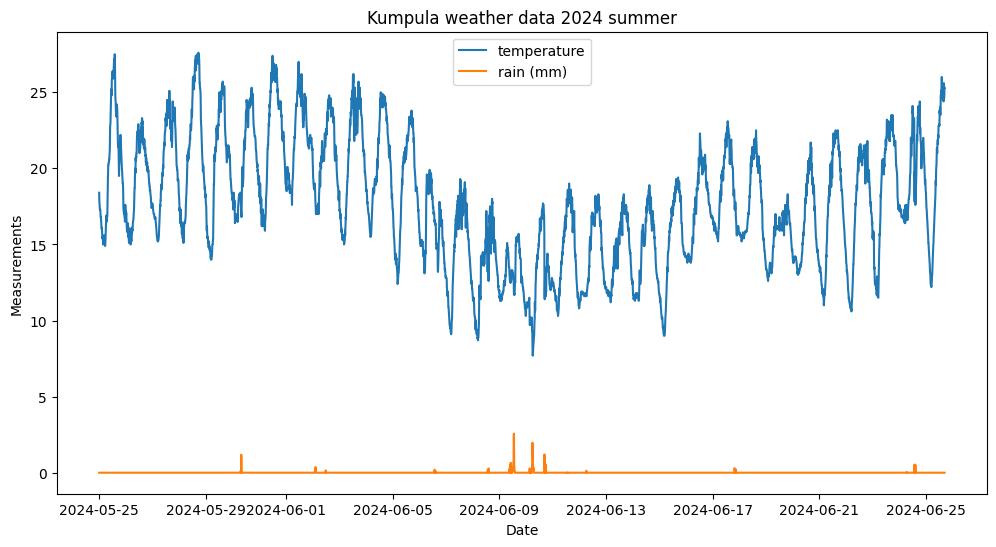

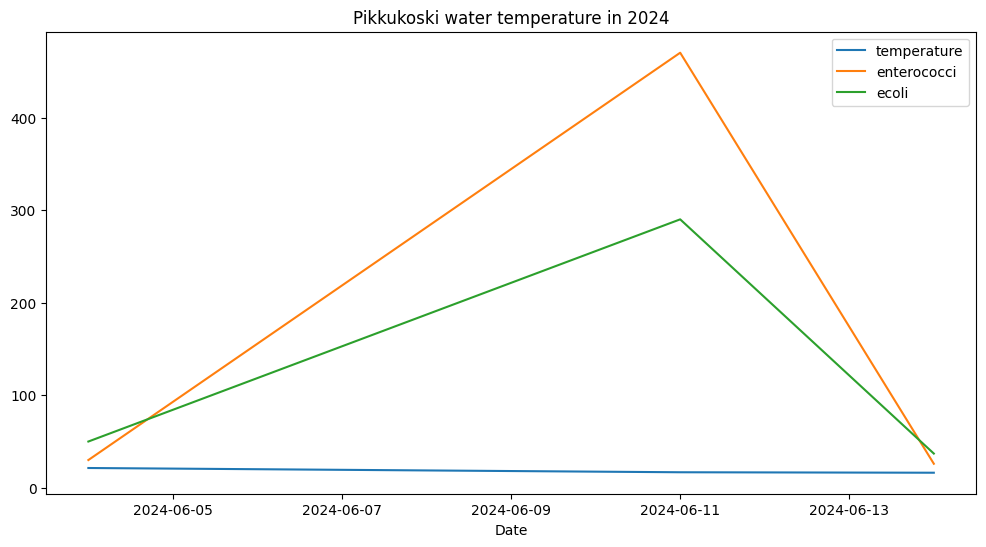

In [8]:
weather = read_weather_data("data/Helsinki Kumpula_ 25.5.2024 - 25.6.2024_3733a5d6-a008-4858-9a88-88e3d33415e8.csv")
plt.figure(figsize=(12, 6))
plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")
plt.title("Kumpula weather data 2024 summer")
plt.xlabel("Date")
plt.ylabel("Measurements")
plt.legend()
plt.show()

data = pd.read_csv("data/pikkukoski_2024.csv")
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(data.index, data["temperature"], label="temperature")
plt.plot(data.index, data["enterococci"], label="enterococci")
plt.plot(data.index, data["ecoli"], label="ecoli")

plt.title("Pikkukoski water temperature in 2024")
plt.xlabel("Date")
plt.ylabel("")
plt.legend()

plt.show()

# Plot the water quality measurement against rain amount

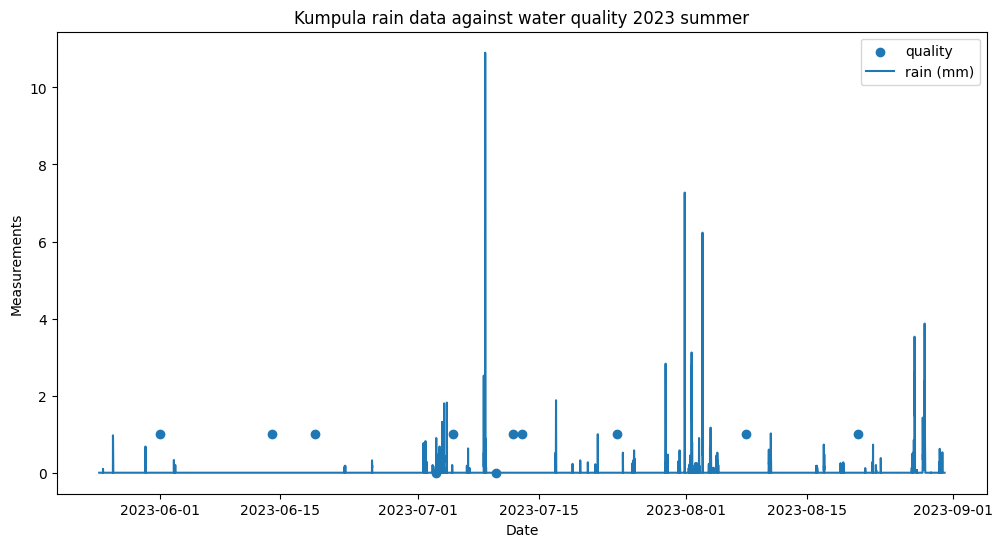

In [9]:
quality = pd.read_csv("data/pikkukoski_2023.csv")
quality["date"] = pd.to_datetime(quality["date"])
quality.set_index("date", inplace=True)
weather = read_weather_data("data/Helsinki Kumpula_ 25.5.2023 - 30.8.2023_d6f3d181-df41-42ba-b2eb-77d9b687db9d.csv")

plt.figure(figsize=(12, 6))

plt.scatter(quality.index, quality["quality"], label="quality")

#plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")

plt.title("Kumpula rain data against water quality 2023 summer")
plt.xlabel("Date")
plt.ylabel("Measurements")
plt.legend()
plt.show()


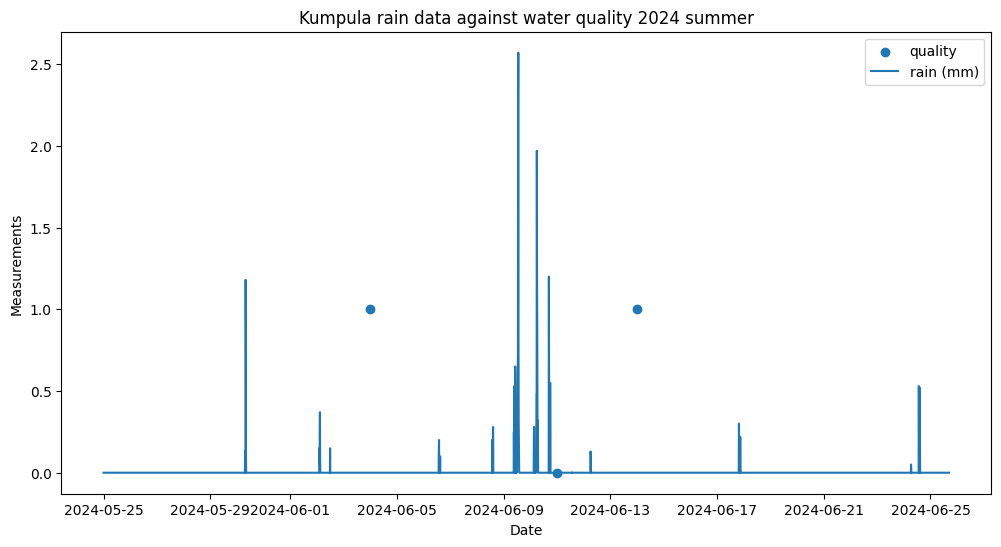

In [11]:
quality = pd.read_csv("data/pikkukoski_2024.csv")
quality["date"] = pd.to_datetime(quality["date"])
quality.set_index("date", inplace=True)
weather = read_weather_data("data/Helsinki Kumpula_ 25.5.2024 - 25.6.2024_3733a5d6-a008-4858-9a88-88e3d33415e8.csv")

plt.figure(figsize=(12, 6))

plt.scatter(quality.index, quality["quality"], label="quality")

#plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")

plt.title("Kumpula rain data against water quality 2024 summer")
plt.xlabel("Date")
plt.ylabel("Measurements")
plt.legend()
plt.show()

In [2]:
def plot_2024_with_time_aggregate(resample_rate: str):
  quality = read_pikkukoski_measurement("data/pikkukoski_2024.csv", 12)
  weather = resample_weather_data(read_weather_data("data/Helsinki Kumpula_ 25.5.2024 - 25.6.2024_3733a5d6-a008-4858-9a88-88e3d33415e8.csv"), resample_rate)

  plt.figure(figsize=(12, 6))

  plt.scatter(quality.index, quality["quality"], label="quality")

  #plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
  plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")

  plt.title("Kumpula rain data against water quality 2024 summer")
  plt.xlabel("Date")
  plt.ylabel("Measurements")
  plt.legend()
  plt.show()

def plot_2023_with_time_aggregate(resample_rate: str):
  quality = read_pikkukoski_measurement("data/pikkukoski_2023.csv", 12)
  weather = resample_weather_data(read_weather_data("data/Helsinki Kumpula_ 25.5.2023 - 30.8.2023_d6f3d181-df41-42ba-b2eb-77d9b687db9d.csv"), resample_rate)

  plt.figure(figsize=(12, 6))

  plt.scatter(quality.index, quality["quality"], label="quality")

  #plt.plot(weather.index, weather["Ilman lämpötila [°C]"], label="temperature")
  plt.plot(weather.index, weather["Sademäärä [mm]"], label="rain (mm)")

  plt.title("Kumpula rain data against water quality 2024 summer")
  plt.xlabel("Date")
  plt.ylabel("Measurements")
  plt.legend()
  plt.show()

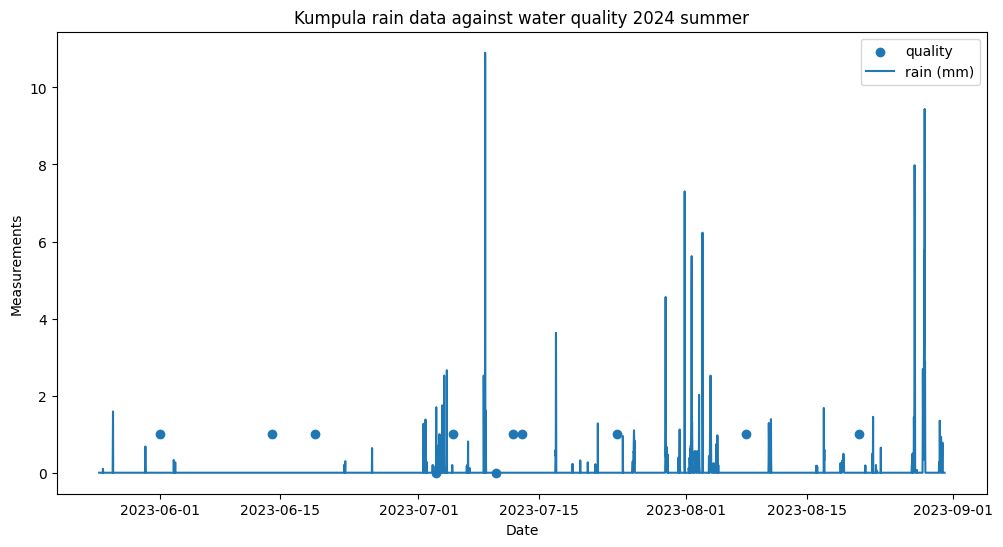

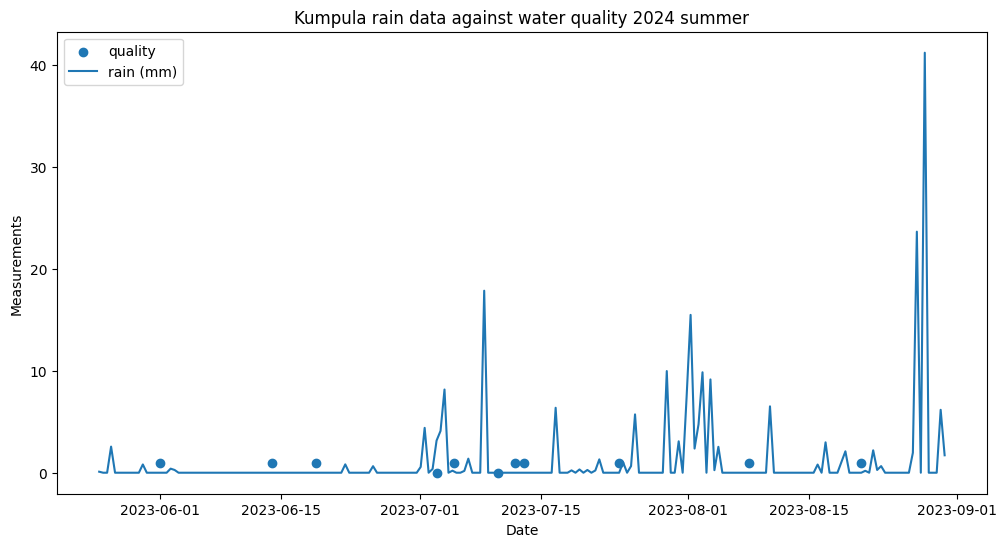

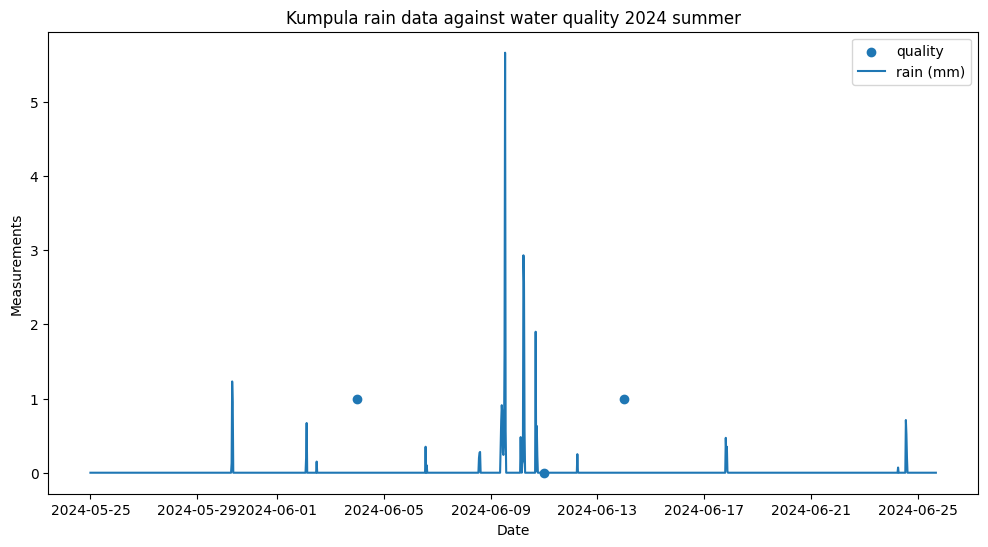

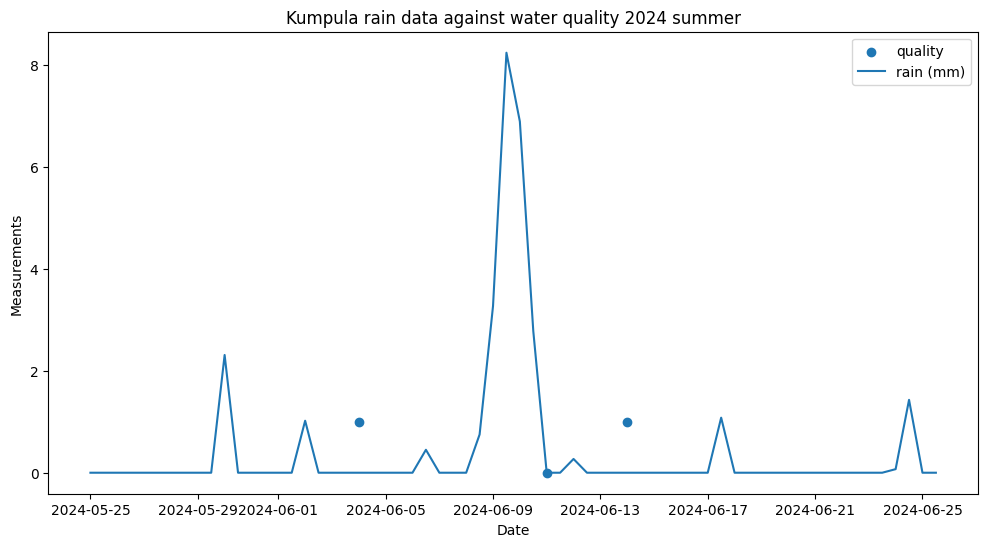

In [5]:
plot_2023_with_time_aggregate("30min")
plot_2023_with_time_aggregate("11h")
plot_2024_with_time_aggregate("30min")
plot_2024_with_time_aggregate("12h")